<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5021 non-null   int64  
 1   observed            4983 non-null   object 
 2   location_details    4260 non-null   object 
 3   county              5021 non-null   object 
 4   state              

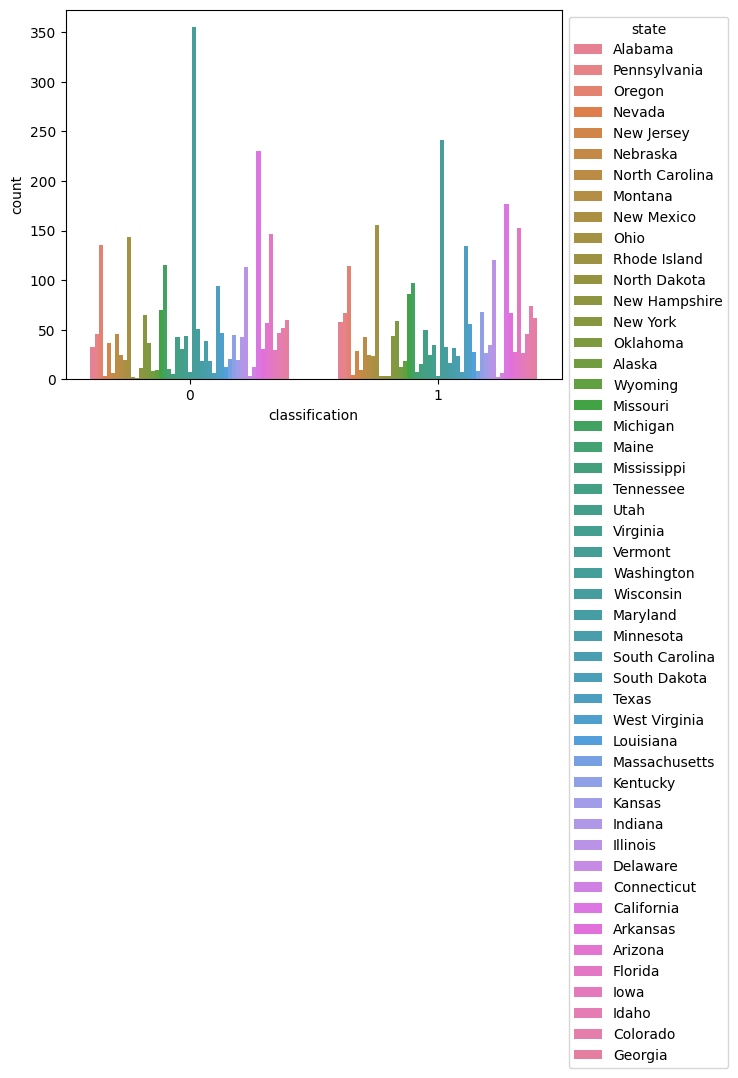

In [1]:
%run EDA.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [3]:
#uploading dataframe with new processed_text column 
df = pd.read_csv('../data/processed_text.csv')

In [4]:
#dropping the 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
pd.set_option('display.max_columns', None) #to view all the columns in the dataframe
df.head()

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,processed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['can', 'tipsy', 'river', 'alabama', 'dusk', '..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['salmon', 'fish', 'companion', 'prince', 'wil..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"['attend', 'stay', 'girlfriend', 'mother', 'ho..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['hello', 'name', 'reluctant', 'post', 'story'..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['friend', 'hill', 'yamhill', 'late', 'even', ..."


In [6]:
#defining the predictor/target variables
X = df['processed_text']
y = df['classification']

In [7]:
#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

## Naive Bayes Classifier - Multinomial

### Using Count Vectorizer

In [8]:
count_vectorizer = CountVectorizer(min_df=0.05, max_df=0.95)
count_X_train = count_vectorizer.fit_transform(X_train.values)
count_X_test = count_vectorizer.transform(X_test.values)

In [9]:
#instantiating the classifier 
count_nb_classifier = MultinomialNB()
count_nb_classifier.fit(count_X_train, y_train)

MultinomialNB()

In [10]:
#using the trained model to predict the classes
y_pred_count = count_nb_classifier.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_count)

0.7956381260096931

In [11]:
metrics.confusion_matrix(y_test, y_pred_count, labels=[0,1])

array([[453, 150],
       [103, 532]])

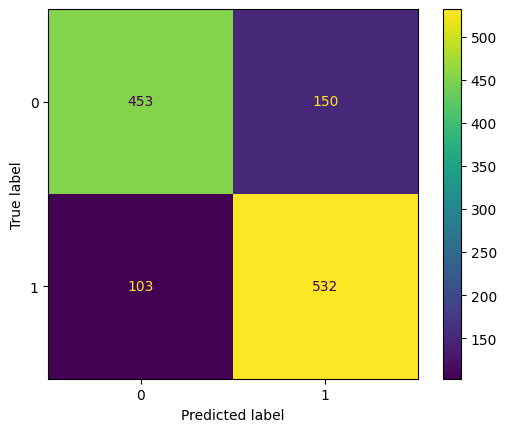

In [12]:
ConfusionMatrixDisplay.from_estimator(count_nb_classifier, count_X_test, y_test);

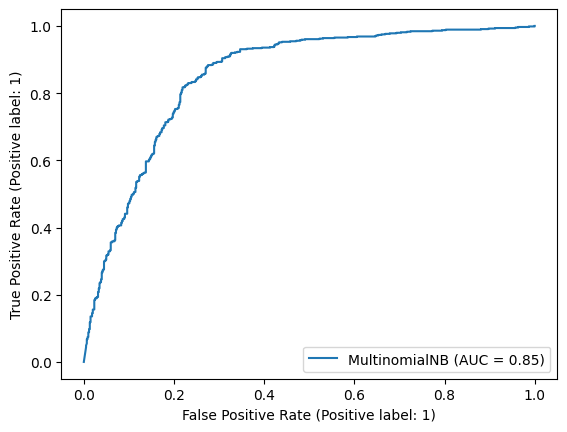

In [13]:
RocCurveDisplay.from_estimator(count_nb_classifier, count_X_test, y_test);

### Using TF-IDF Vectorizer

In [14]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.05, max_df=0.95)
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_X_test = tfidf_vectorizer.transform(X_test.values)

In [15]:
tfidf_nb_classifier = MultinomialNB()
tfidf_nb_classifier.fit(tfidf_X_train, y_train)

MultinomialNB()

In [16]:
y_pred_tfidf = tfidf_nb_classifier.predict(tfidf_X_test)
metrics.accuracy_score(y_test, y_pred_tfidf)

0.7875605815831987

In [17]:
metrics.confusion_matrix(y_test, y_pred_tfidf, labels=[0, 1])

array([[473, 130],
       [133, 502]])

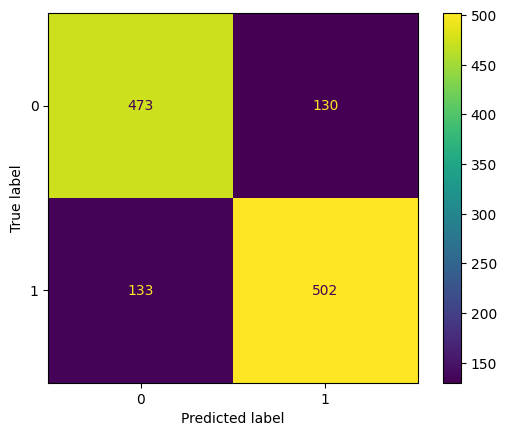

In [18]:
ConfusionMatrixDisplay.from_estimator(tfidf_nb_classifier, tfidf_X_test, y_test);

## Logistic Regression 

In [19]:
logreg = LogisticRegression(random_state=88)
logreg.fit(count_X_train, y_train)

/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [20]:
y_pred_logreg = logreg.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_logreg)

0.7697899838449112

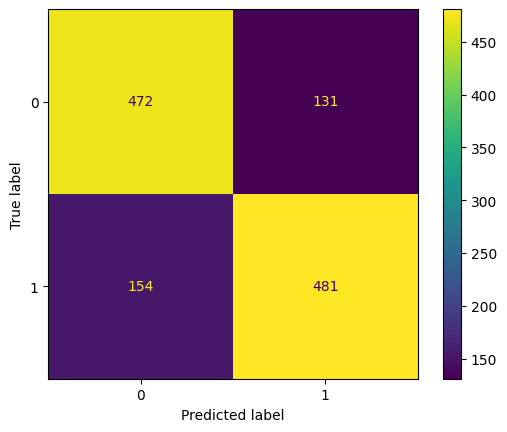

In [21]:
ConfusionMatrixDisplay.from_estimator(logreg, count_X_test, y_test);

In [22]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       603
           1       0.79      0.76      0.77       635

    accuracy                           0.77      1238
   macro avg       0.77      0.77      0.77      1238
weighted avg       0.77      0.77      0.77      1238



In [23]:
logreg_pipe = Pipeline([("logreg", LogisticRegression(random_state=88))])

params = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'logreg__class_weight': ['balanced'],
          'logreg__solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

logreg_gs = GridSearchCV(logreg_pipe, param_grid=params, cv=5)

In [24]:
logreg_gs.fit(count_X_train, y_train)

/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=88))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__class_weight': ['balanced'],
                         'logreg__solver': ['lbfgs', 'liblinear', 'sag',
                                            'saga']})

In [25]:
best_est = logreg_gs.best_estimator_
best_est

Pipeline(steps=[('logreg',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    random_state=88, solver='saga'))])

In [26]:
tuned_logreg = LogisticRegression(C=0.001, class_weight='balanced', random_state=88,
                   solver='saga')
tuned_logreg.fit(count_X_train, y_train)

y_pred_tuned_logreg = tuned_logreg.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_tuned_logreg)

0.8004846526655897

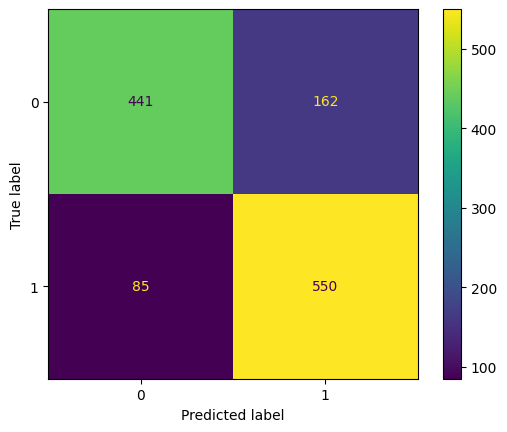

In [27]:
ConfusionMatrixDisplay.from_estimator(tuned_logreg, count_X_test, y_test);

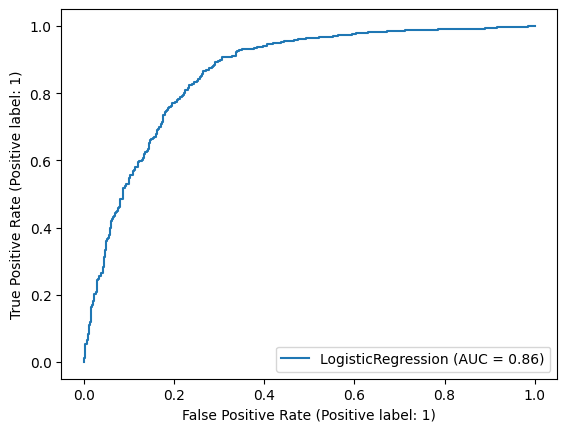

In [28]:
RocCurveDisplay.from_estimator(tuned_logreg, count_X_test, y_test);

## Decision Tree Classifier

In [29]:
#decision tree model with count vectorizer 
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=88)
tree_clf.fit(count_X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=88)

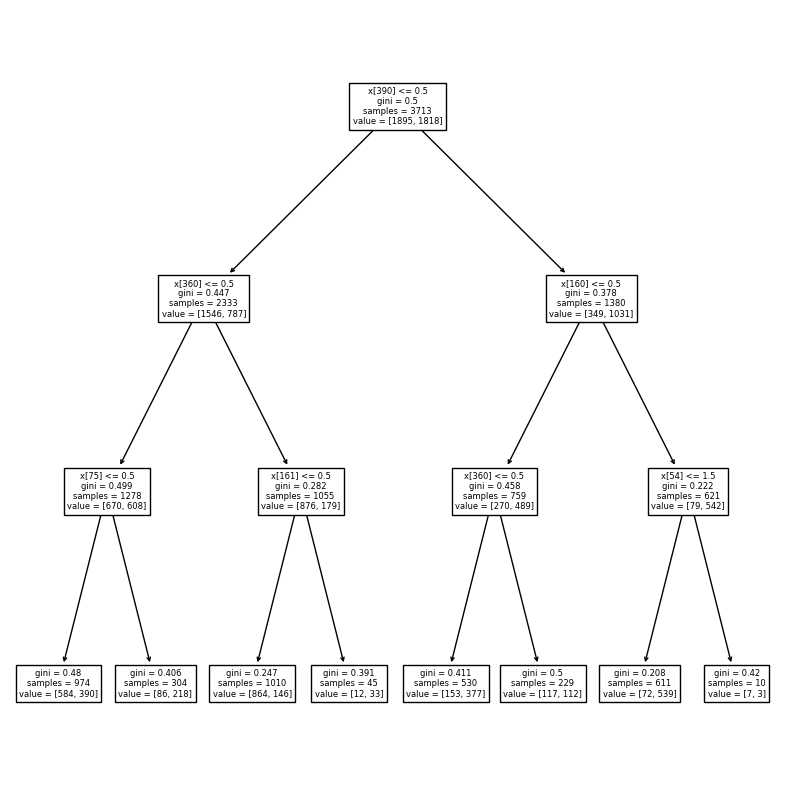

In [30]:
#plotting the decision tree
f, ax =  plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);

In [31]:
y_pred_tree_clf = tree_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_tree_clf)

0.7180936995153473

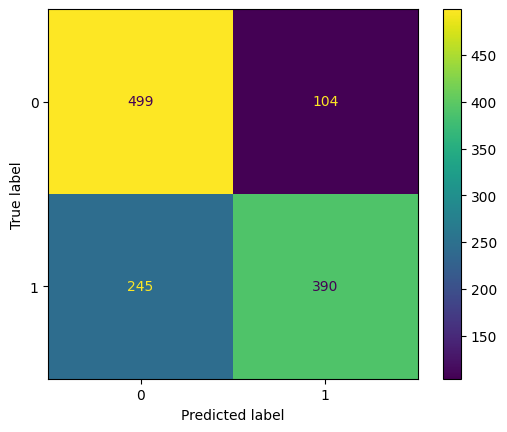

In [32]:
ConfusionMatrixDisplay.from_estimator(tree_clf, count_X_test, y_test);

### Using a Pipeline/GridSearchCV for Decision Tree

In [33]:
 #creating a pipeline and gridsearching over the pipeline
tree_clf_pipe = Pipeline([("tree_clf", DecisionTreeClassifier(random_state=88))])
tree_clf_params = ({'tree_clf__criterion': ['gini', 'entropy', 'log_loss'],
                    'tree_clf__splitter': ['best', 'random'],
                    'tree_clf__max_depth':np.arange(3,30,3),
                    'tree_clf__min_samples_leaf':np.arange(2,10,2),
                    'tree_clf__max_features':np.arange(6,30,2)})
tree_clf_gs = GridSearchCV(tree_clf_pipe, param_grid=tree_clf_params, cv=5)

In [34]:
tree_clf_gs.fit(count_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree_clf',
                                        DecisionTreeClassifier(random_state=88))]),
             param_grid={'tree_clf__criterion': ['gini', 'entropy', 'log_loss'],
                         'tree_clf__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]),
                         'tree_clf__max_features': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'tree_clf__min_samples_leaf': array([2, 4, 6, 8]),
                         'tree_clf__splitter': ['best', 'random']})

In [35]:
best_est = tree_clf_gs.best_estimator_
best_est

Pipeline(steps=[('tree_clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features=20, min_samples_leaf=8,
                                        random_state=88))])

In [36]:
tuned_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=20,
                       min_samples_leaf=8, random_state=88)

tuned_tree_clf.fit(count_X_train, y_train)

y_pred_tuned_tree = tuned_tree_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_tuned_tree)

0.7237479806138933

Even with the tuned parameters, the accuracy score did not fluctuate much. 

## Random Forest Classifier

In [37]:
#creating a pipeline and gridsearching over the pipeline
rf_pipe = Pipeline([("rf", RandomForestClassifier(random_state=88))])
params = ({'rf__n_estimators':np.arange(4,20,4),
            'rf__max_depth':np.arange(3,30,3),
            'rf__min_samples_leaf':np.arange(2,10,2),
            'rf__max_features':np.arange(6,24,2)})
rf_gs = GridSearchCV(rf_pipe, param_grid=params, cv=5)

In [38]:
rf_gs.fit(count_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=88))]),
             param_grid={'rf__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]),
                         'rf__max_features': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22]),
                         'rf__min_samples_leaf': array([2, 4, 6, 8]),
                         'rf__n_estimators': array([ 4,  8, 12, 16])})

In [39]:
best_est = rf_gs.best_estimator_
best_est

Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=24, max_features=22,
                                        min_samples_leaf=8, n_estimators=16,
                                        random_state=88))])

In [40]:
best_par = rf_gs.best_params_
best_par

{'rf__max_depth': 24,
 'rf__max_features': 22,
 'rf__min_samples_leaf': 8,
 'rf__n_estimators': 16}

In [41]:
#running Random Forest with the best parameters
rf_clf = RandomForestClassifier(max_depth=24, max_features=22, min_samples_leaf=8,
                       n_estimators=16, random_state=88)
rf_clf.fit(count_X_train, y_train)

y_pred_rf = rf_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_rf)

0.7810985460420032

## Extra Trees Classifier

In [42]:
et_pipe = Pipeline([("et", ExtraTreesClassifier(random_state=88))])
params = ({'et__n_estimators':np.arange(4,20,4),
            'et__max_depth':np.arange(3,30,3),
            'et__min_samples_leaf':np.arange(2,10,2),
            'et__max_features':np.arange(6,24,2)})
et_gs = GridSearchCV(et_pipe, param_grid=params, cv=5)

In [43]:
et_gs.fit(count_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('et',
                                        ExtraTreesClassifier(random_state=88))]),
             param_grid={'et__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]),
                         'et__max_features': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22]),
                         'et__min_samples_leaf': array([2, 4, 6, 8]),
                         'et__n_estimators': array([ 4,  8, 12, 16])})

In [44]:
best_est = et_gs.best_estimator_
best_est

Pipeline(steps=[('et',
                 ExtraTreesClassifier(max_depth=27, max_features=16,
                                      min_samples_leaf=8, n_estimators=16,
                                      random_state=88))])

In [45]:
#running Extra Trees with the best parameters
et_clf = ExtraTreesClassifier(max_depth=27, max_features=16, min_samples_leaf=8,
                     n_estimators=16, random_state=88)

et_clf.fit(count_X_train, y_train)

y_pred_et = et_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_et)

0.784329563812601

## Bag of Words

In [46]:
#creating a bag of words with CountVectorizer
feat_names = count_vectorizer.get_feature_names_out()

pd.DataFrame(count_X_train.toarray(), columns = feat_names)

,able,actually,afraid,afternoon,ago,ahead,air,almost,alone,along,also,always,animal,anyone,anything,anyway,ape,appear,approach,approximately,area,arm,around,arrive,ask,attention,away,back,bad,bank,bark,base,bear,become,bed,begin,believe,best,big,bigfoot,bird,bit,black,body,bottom,branch,break,brother,brown,brush,build,bush,call,camp,campfire,car,carry,catch,check,clear,clearly,climb,close,closer,color,come,completely,continue,corner,country,county,couple,cover,coyote,crazy,creature,creek,cross,cut,dad,dark,day,dead,decide,deep,deer,definitely,describe,detail,different,direction,directly,dirt,disappear,distance,dog,door,drive,drop,due,earlier,early,east,edge,else,ely,encounter,end,enough,entire,estimate,even,ever,everything,exactly,experience,explain,extremely,eye,face,fact,fall,family,far,fast,father,fear,feel,felt,fence,field,fight,figure,finally,find,fire,first,fish,flashlight,flat,follow,foot,footprint,forest,forget,friend,front,full,fur,get,give,go,good,grab,grass,ground,grow,growl,guess,gun,hair,hairy,half,hand,happen,hard,head,headlight,hear,heard,heavy,height,hell,help,hide,high,highway,hill,hit,home,hop,hour,house,however,howl,huge,human,hunt,hunter,husband,idea,immediately,inch,incident,jump,keep,kind,kiss,knew,knock,know,lake,land,large,last,late,later,lay,lead,least,leave,left,leg,legs,less,let,life,light,like,line,listen,little,live,local,locate,location,log,long,longer,look,looked,lose,lot,loud,low,make,man,many,mark,maybe,meet,mention,middle,mile,mind,mine,minute,moment,month,morning,mother,mountain,move,movement,much,name,national,neck,need,neighbor,never,new,next,night,noise,north,note,nothing,notice,noticed,observe,occur,old,open,others,outside,pack,parent,park,part,pass,past,path,people,person,pick,picture,pitch,place,play,point,possible,pretty,print,probably,property,pull,put,quickly,quiet,quite,raise,ran,reach,read,real,realize,really,reason,record,red,remember,report,rest,return,ridge,right,river,road,rock,round,run,sasquatch,saw,say,scar,scared,scream,search,season,second,see,seem,set,several,shake,shape,short,shot,shoulder,show,side,sight,sign,similar,sit,site,size,sleep,slightly,slow,slowly,small,smell,snow,someone,something,son,soon,sort,sound,south,speak,speed,spend,spot,spring,stand,star,start,state,stay,steep,step,stick,still,stood,stop,story,straight,strange,stride,sudden,suddenly,summer,sun,sure,swamp,take,talk,tall,tell,tent,thick,thing,think,thought,throw,time,toe,together,told,top,towards,town,track,trail,travel,tree,trip,truck,try,turn,type,unusual,upright,use,vehicle,view,wait,wake,walk,walked,want,watch,water,way,week,well,west,white,whole,wide,wife,wild,window,witness,wood,wooded,work,yard,year,yell,yes,yet,young
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,7,0,0,3,0,0,0,0,0,2,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,0,0,0,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
#creating a bag of words with TfidfVectorizer  
feat_names = tfidf_vectorizer.get_feature_names_out()

pd.DataFrame(tfidf_X_train.toarray(), columns = feat_names)

,able,actually,afraid,afternoon,ago,ahead,air,almost,alone,along,also,always,animal,anyone,anything,anyway,ape,appear,approach,approximately,area,arm,around,arrive,ask,attention,away,back,bad,bank,bark,base,bear,become,bed,begin,believe,best,big,bigfoot,bird,bit,black,body,bottom,branch,break,brother,brown,brush,build,bush,call,camp,campfire,car,carry,catch,check,clear,clearly,climb,close,closer,color,come,completely,continue,corner,country,county,couple,cover,coyote,crazy,creature,creek,cross,cut,dad,dark,day,dead,decide,deep,deer,definitely,describe,detail,different,direction,directly,dirt,disappear,distance,dog,door,drive,drop,due,earlier,early,east,edge,else,ely,encounter,end,enough,entire,estimate,even,ever,everything,exactly,experience,explain,extremely,eye,face,fact,fall,family,far,fast,father,fear,feel,felt,fence,field,fight,figure,finally,find,fire,first,fish,flashlight,flat,follow,foot,footprint,forest,forget,friend,front,full,fur,get,give,go,good,grab,grass,ground,grow,growl,guess,gun,hair,hairy,half,hand,happen,hard,head,headlight,hear,heard,heavy,height,hell,help,hide,high,highway,hill,hit,home,hop,hour,house,however,howl,huge,human,hunt,hunter,husband,idea,immediately,inch,incident,jump,keep,kind,kiss,knew,knock,know,lake,land,large,last,late,later,lay,lead,least,leave,left,leg,legs,less,let,life,light,like,line,listen,little,live,local,locate,location,log,long,longer,look,looked,lose,lot,loud,low,make,man,many,mark,maybe,meet,mention,middle,mile,mind,mine,minute,moment,month,morning,mother,mountain,move,movement,much,name,national,neck,need,neighbor,never,new,next,night,noise,north,note,nothing,notice,noticed,observe,occur,old,open,others,outside,pack,parent,park,part,pass,past,path,people,person,pick,picture,pitch,place,play,point,possible,pretty,print,probably,property,pull,put,quickly,quiet,quite,raise,ran,reach,read,real,realize,really,reason,record,red,remember,report,rest,return,ridge,right,river,road,rock,round,run,sasquatch,saw,say,scar,scared,scream,search,season,second,see,seem,set,several,shake,shape,short,shot,shoulder,show,side,sight,sign,similar,sit,site,size,sleep,slightly,slow,slowly,small,smell,snow,someone,something,son,soon,sort,sound,south,speak,speed,spend,spot,spring,stand,star,start,state,stay,steep,step,stick,still,stood,stop,story,straight,strange,stride,sudden,suddenly,summer,sun,sure,swamp,take,talk,tall,tell,tent,thick,thing,think,thought,throw,time,toe,together,told,top,towards,town,track,trail,travel,tree,trip,truck,try,turn,type,unusual,upright,use,vehicle,view,wait,wake,walk,walked,want,watch,water,way,week,well,west,white,whole,wide,wife,wild,window,witness,wood,wooded,work,yard,year,yell,yes,yet,young
0,0.0,0.0,0.165239,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.248147,0.070670,0.037613,0.057099,0.000000,0.0,0.418010,0.0,0.000000,0.096470,0.00000,0.000000,0.000000,0.0,0.000000,0.157847,0.000000,0.000000,0.054159,0.082239,0.100805,0.000000,0.000000,0.075212,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.378388,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.074017,0.065868,0.072452,0.0,0.208296,0.0,0.0,0.0,0.000000,0.060087,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.043868,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.078207,0.0,0.0,0.0,0.000000,0.064532,0.000000,0.0,0.00000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.070395,0.0,0.000000,0.0,0.0,0.0,0.0,0.051203,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.136422,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.076989,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.057917,0.035116,0.000000,0.0,0.000000,0.049151,0.000000,0.0,0.000000,0.033181,0.000000,0.066126,0.0,0.00000,0.000000,0.00000,0.162453,0.000000,0.078051,0.000000,0.048581,0.000000,0.000000,0.0,0.000000,0.0,0.044709,0.000000,0.039238,0.000000,0.0,0.0,0.0,0.0,0.000000,0.059383,0.0,0.000000,0.0,0.000000,0.085595,0.000000,0.000000,0.0000

## Topic Modeling

In [48]:
# pip install pyLDAvis

In [49]:
import pyLDAvis.gensim # a specialized package for topic model visualization
from gensim import corpora
from gensim.corpora import Dictionary

#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

In [50]:
corpus = df['processed_text']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<4951x14912 sparse matrix of type '<class 'numpy.float64'>'
	with 519796 stored elements in Compressed Sparse Row format>

In [51]:
topic_model = NMF(n_components = 5, random_state=88)
topic_model.fit(X_train)

NMF(n_components=5, random_state=88)

In [52]:
# to get H
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (5, 14912)
Shape of H is (4951, 5)
Shape of X_train is (4951, 14912)


In [53]:
W[1] #weights of the word for given topic 

array([0.        , 0.00056747, 0.00112738, ..., 0.        , 0.        ,
       0.00183294])

In [54]:
# for index,topic in enumerate(W):
#     print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
#     print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:10]])
#     print('\n')

In [55]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

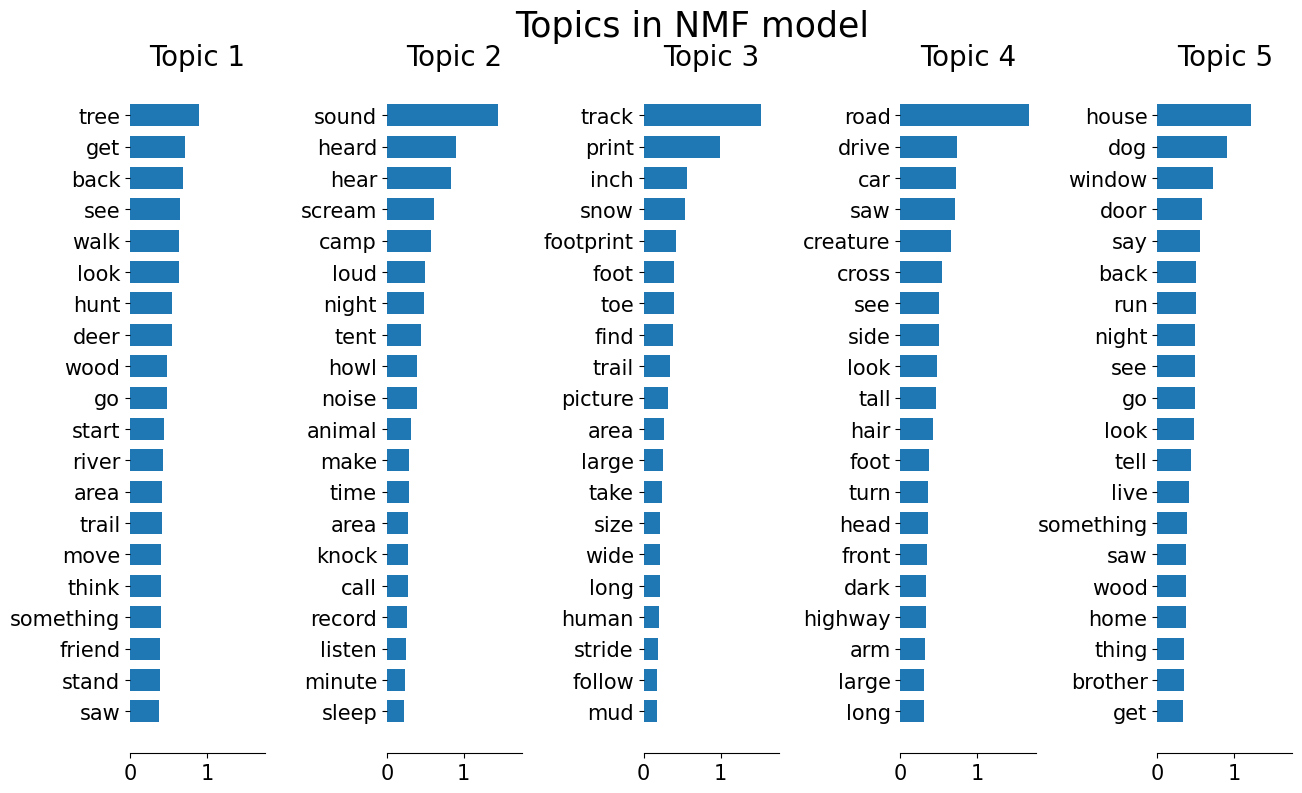

In [56]:
topic_word_plot()

In [57]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [58]:
topic_name_dict = {0: 'outdoors', 1: 'sounds', 2: 'prints', 3: 'roads', 4: 'indoors'}

In [59]:
# for each document take the topic with the highest weight and assign the document to this class -- hard clustering.
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

In [60]:
dataset_orig = df.rename(columns = {'REPORT_NUMBER': 'report_number', 'OBSERVED': 'observed', 'processed_text': 'processed_text', 'classification': 'classification'})

In [61]:
from copy import deepcopy
dataset = deepcopy(dataset_orig).drop(columns = ['classification'])
dataset.head()

,YEAR,NEAREST_TOWN,NEAREST_ROAD,observed,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,report_number,location_details,county,state,season,title,latitude,longitude,number,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,processed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['can', 'tipsy', 'river', 'alabama', 'dusk', '..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['salmon', 'fish', 'companion', 'prince', 'wil..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"['attend', 'stay', 'girlfriend', 'mother', 'ho..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['hello', 'name', 'reluctant', 'post', 'story'..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['friend', 'hill', 'yamhill', 'late', 'even', ..."


In [62]:
dataset_new = dataset[dataset['processed_text'] != '']

In [63]:
# takes in list of documents and plots topic weight vectors for each document
def topic_topbreakdown(locator):

    print(dataset_orig.loc[locator].processed_text)
    int_index = dataset_new.index.get_loc(locator)

    topic_keys = topic_name_dict.values()
    zipped_tuple = list(zip(topic_keys, list(H[int_index,:])))

    topic_breakdown = pd.DataFrame(zipped_tuple, columns = ['Topic', 'Weight']).set_index(['Topic'])
    topic_breakdown['Normalized weight'] = topic_breakdown['Weight']/topic_breakdown['Weight'].sum()

    sns.barplot(y = topic_breakdown.index, x = 'Normalized weight', data = topic_breakdown)
    plt.title("Distribution of topics for reports " + str(locator))
    plt.show()

    return topic_breakdown

['child', 'return', 'albus', 'oklahoma', 'burn', 'flat', 'oklahoma', 'fall', 'large', 'black', 'man', 'creature', 'cross', 'highway', 'move', 'west', 'east', 'drive', 'son', 'age', 'sit', 'front', 'seat', 'daughter', 'age', 'sit', 'back', 'seat', 'lean', 'forward', 'driver', 'passenger', 'seat', 'clear', 'sunny', 'day', 'lull', 'conversation', 'quiet', 'car', 'radio', 'happen', 'look', 'straight', 'ahead', 'noticed', 'movement', 'leave', 'side', 'road', 'amaze', 'see', 'perceive', 'large', 'black', 'man', 'creature', 'rise', 'squat', 'position', 'run', 'lane', 'highway', 'yard', 'ahead', 'run', 'highway', 'cover', 'distance', 'step', 'estimate', 'creature', 'least', 'foot', 'tall', 'glance', 'briefly', 'direction', 'car', 'instinctively', 'apply', 'brake', 'hit', 'run', 'bar', 'ditch', 'east', 'side', 'road', 'duck', 'brush', 'large', 'bush', 'ditch', 'barb', 'wire', 'fence', 'hair', 'look', 'rather', 'silk', 'run', 'remember', 'see', 'hair', 'move', 'run', 'hair', 'appear', 'stiff', '

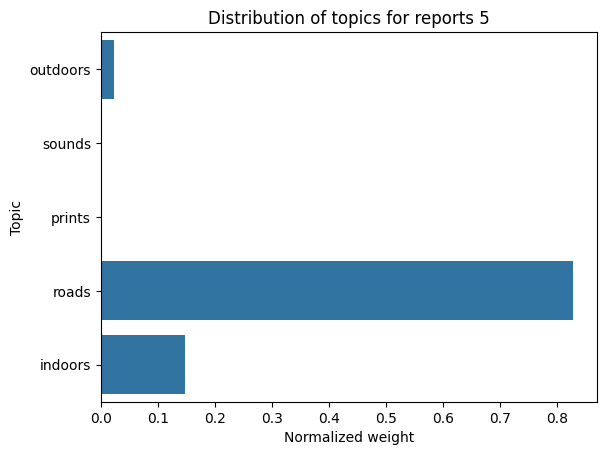

['way', 'claremont', 'lebanon', 'ate', 'passing', 'reed', 'marshy', 'area', 'next', 'road', 'sound', 'huge', 'flock', 'bird', 'creature', 'come', 'reed', 'crouch', 'look', 'surprisingly', 'get', 'reed', 'crouch', 'stand', 'turn', 'ran', 'towards', 'wooded', 'area', 'hill', 'move', 'arm', 'brush', 'tree', 'branch', 'way', 'incredibly', 'fast', 'runner', 'get', 'good', 'look', 'coronet', 'shape', 'head', 'run', 'away', 'light', 'brown', 'brown', 'incredibly', 'broad', 'shoulder', 'go', 'back', 'day', 'marsh', 'go', 'knee', 'smell', 'bad', 'odor', 'garage', 'friend', 'go', 'back', 'fight', 'find', 'footprint', 'hair', 'sample', 'hear', 'wood', 'knock', 'friend', 'james', 'call', 'also', 'find', 'large', 'bed', 'branch', 'tree', 'structure', 'follow', 'month', 'go', 'back', 'claremont', 'heard', 'stretch', 'wood', 'travel', 'ate', 'bicycle']


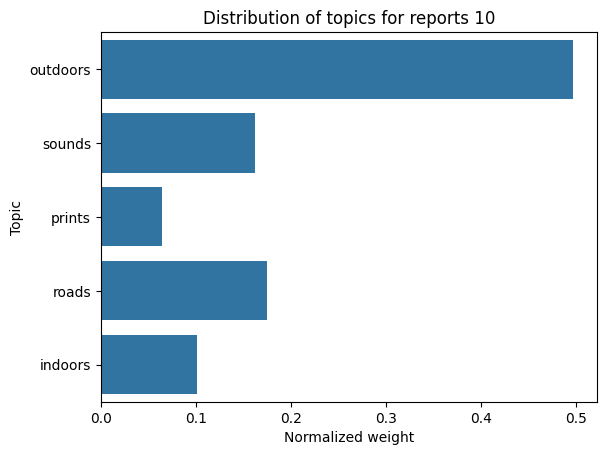

['foot', 'print', 'bigfoot', 'creature', 'visit', 'ranch', 'house', 'son', 'family', 'rent', 'day', 'track', 'appear', 'daughter', 'law', 'like', 'mile', 'gulch', 'look', 'deer', 'track', 'backtrack', 'track', 'creature', 'find', 'come', 'track', 'head', 'gulch', 'follow', 'back', 'house', 'large', 'go', 'house', 'barn', 'field', 'house', 'small', 'stay', 'rabbit', 'patch', 'curiously', 'curl', 'foot', 'large', 'creature', 'print', 'measure', 'inch', 'small', 'print', 'measure', 'inch', 'curved', 'foot', 'take', 'picture', 'print', 'thing', 'strike', 'print', 'creature', 'massive', 'cold', 'snow', 'ice', 'ground', 'frozen', 'hard', 'jump', 'break', 'ground', 'print', 'creature', 'go', 'completely', 'ice', 'see', 'creatures', 'serve', 'print']


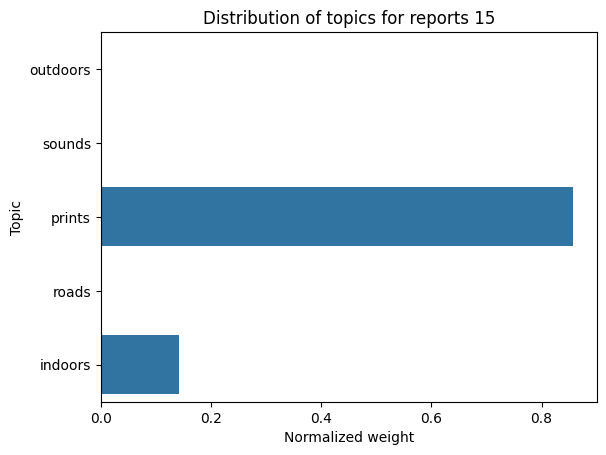

['spring', 'drive', 'around', 'country', 'road', 'friend', 'listen', 'music', 'tape', 'jam', 'pulled', 'fix', 'leave', 'car', 'run', 'headlight', 'look', 'tape', 'saw', 'bush', 'move', 'opposite', 'side', 'road', 'assume', 'deer', 'wrong', 'start', 'fix', 'tape', 'muddy', 'say', 'hell', 'look', 'see', 'large', 'gray', 'haired', 'creature', 'step', 'bush', 'walk', 'leg', 'man', 'tall', 'basin', 'height', 'muddy', 'oft', 'tall', 'walk', 'road', 'yard', 'front', 'stop', 'looked', 'second', 'walk', 'road', 'wood', 'start', 'hill', 'human', 'hand', 'foot', 'face', 'cover', 'long', 'gray', 'hair']


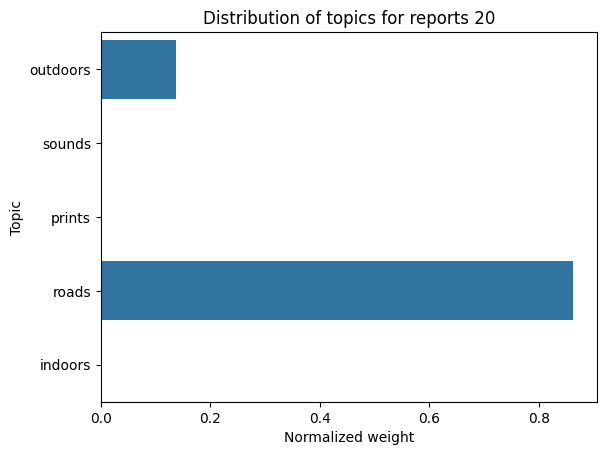

In [64]:
topic_loc_list = [5,10,15,20]
g = list(map(topic_topbreakdown, topic_loc_list))

In [65]:
df.iloc[15]

YEAR                                                                1988
NEAREST_TOWN                                                 Walkerville
NEAREST_ROAD                                                         NaN
OBSERVED               The foot prints of two bigfoot creatures who h...
ALSO_NOTICED           The week after the finding of the prints at ab...
OTHER_WITNESSES        We had been called by my son to come out to se...
OTHER_STORIES                                                        NaN
TIME_AND_CONDITIONS    very cold and the snow and ice on the ground w...
ENVIRONMENT            a deep gulch in the mountains with a creek run...
REPORT_NUMBER                                                     1757.0
location_details       At Bull Run Gulch just northwest of Walkervill...
county                                                 Silver Bow County
state                                                            Montana
season                                             

In [66]:
dataset_orig['observed'][15]

"The foot prints of two bigfoot creatures who had visited the ranch house my son and his family were renting. The day before these tracks appeared my daughter-in-law and I had hiked about a mile up the gulch looking for deer tracks. In backtracking the tracks of the two creatures we found that they had come upon our tracks at the head of the gulch and had followed them back to the  house and that the larger of the two had gone all around the house, barn and fields below the house. The smaller one stayed out by the rabbit hutches and had curiously curled feet.  The larger creatures prints measured 17 inches and the smaller one's prints measured 14 1/2 inches around the curved foot. We took pictures of the prints and the thing that struck us most about prints was that the creatures had to have been massive as it was very cold and the snow and ice on the ground was frozen so hard that we could jump up and down without breaking through to the ground, but every print of both creatures went 

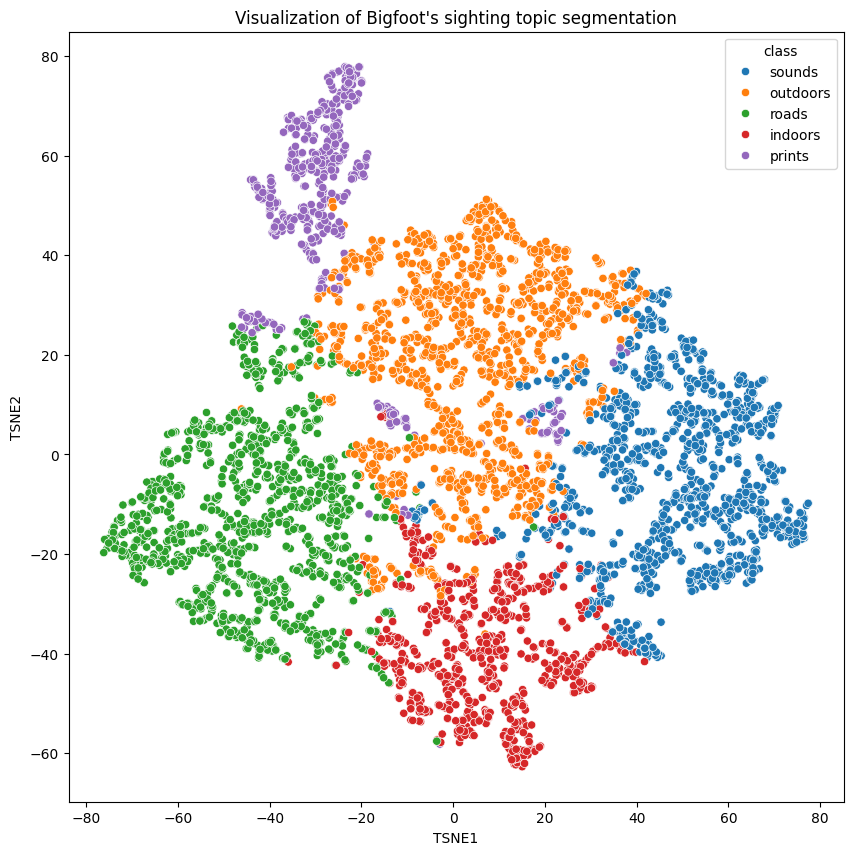

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title("Visualization of Bigfoot's sighting topic segmentation")
plt.show()

## Topics in Class A

In [68]:
class_a = df[df['classification'] == 1]

In [69]:
corpus = class_a['processed_text']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<2453x11166 sparse matrix of type '<class 'numpy.float64'>'
	with 257753 stored elements in Compressed Sparse Row format>

In [70]:
topic_model = NMF(n_components = 5, random_state=88)
topic_model.fit(X_train)

/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=5, random_state=88)

In [71]:
# to get H
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (5, 11166)
Shape of H is (2453, 5)
Shape of X_train is (2453, 11166)


In [72]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(W, tfidf_feature_names, n_top_words, "Class A: Topics in NMF model")

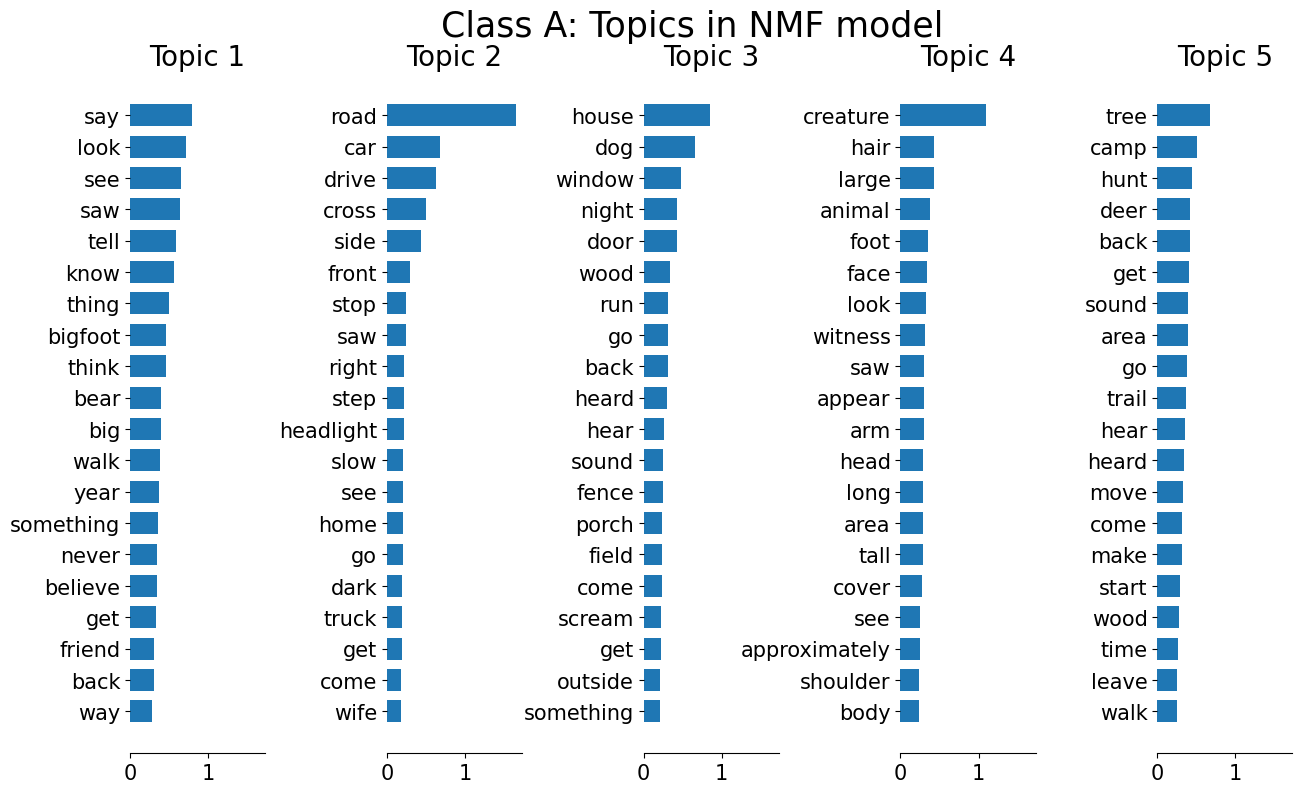

In [73]:
topic_word_plot()

## Topics in Class B

In [74]:
class_b = df[df['classification'] == 0]

In [75]:
corpus = class_b['processed_text']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<2498x11384 sparse matrix of type '<class 'numpy.float64'>'
	with 262043 stored elements in Compressed Sparse Row format>

In [76]:
topic_model = NMF(n_components = 5, random_state=88)
topic_model.fit(X_train)

NMF(n_components=5, random_state=88)

In [77]:
# to get H
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (5, 11384)
Shape of H is (2498, 5)
Shape of X_train is (2498, 11384)


In [78]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(W, tfidf_feature_names, n_top_words, "Class B: Topics in NMF model")

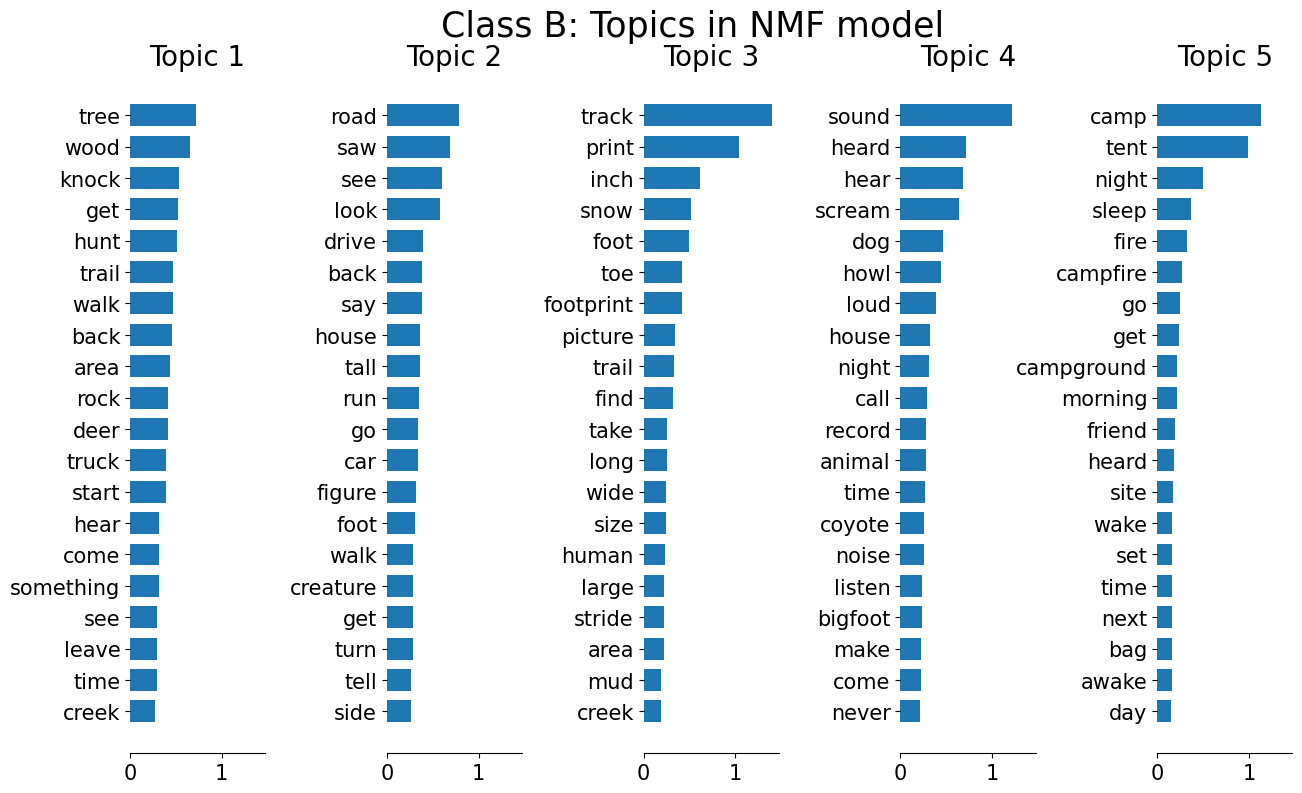

In [79]:
topic_word_plot()

## Word Clouds

In [11]:
# pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

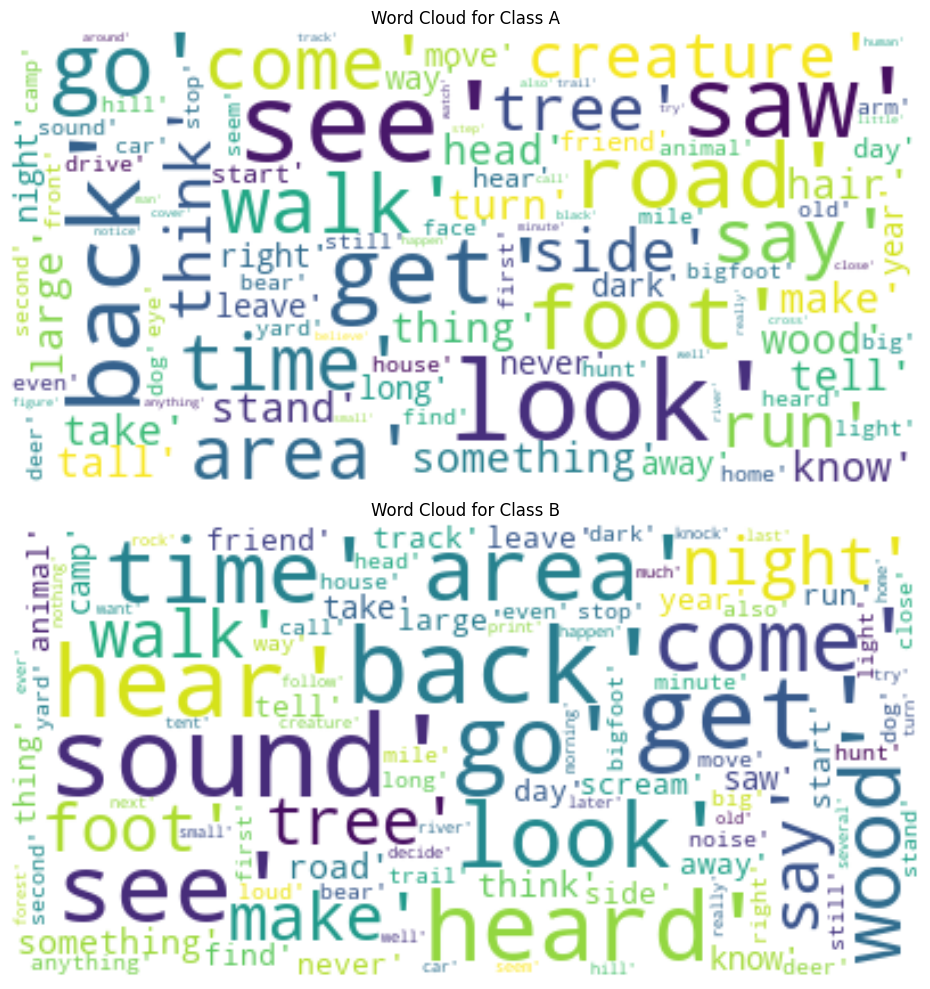

In [10]:
# Filtering the DataFrame for classes a and b
class_a = df[df['classification'] == 1]['processed_text']
class_b = df[df['classification'] == 0]['processed_text']

# Concatenate each class into a single string
class_a_text = " ".join(review for review in class_a)
class_b_text = " ".join(review for review in class_b)

# Generate a word cloud image for class a
wordcloud_a = WordCloud(max_font_size=50, max_words=100, collocations=False, background_color="white").generate(class_a_text)

# Generate a word cloud image for class b
wordcloud_b = WordCloud(max_font_size=50, max_words=100, collocations=False, background_color="white").generate(class_b_text)

# Display the generated images
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# class a word cloud
axs[0].imshow(wordcloud_a, interpolation='bilinear')
axs[0].set_title('Word Cloud for Class A')
axs[0].axis('off')

# class b word cloud
axs[1].imshow(wordcloud_b, interpolation='bilinear')
axs[1].set_title('Word Cloud for Class B')
axs[1].axis('off')

# Adjust layout
plt.tight_layout()

# Show the word clouds
plt.show()